<a href="https://colab.research.google.com/github/singhsumit7890/Infosys_Stroke-Patient-Healthcare-Using-Deep-Learning/blob/main/Milestone4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(1) STROKE PATIENT - DATA EXPLORATION**
---



**Dataset:**


*   id: Unique identifier for each patient.
*   gender: Gender of the patient.
*   age: Age of the patient.
*   hypertension: Whether the patient has hypertension (1 = Yes, 0 = No).
*   heart_disease: Whether the patient has heart disease (1 = Yes, 0 = No).
*   ever_married: Marital status of the patient.
*   work_type: Type of employment the patient engages in.
*   Residence_type: Whether the patient lives in an urban or rural area.
*   avg_glucose_level: Average glucose level in the patient’s blood.
*   bmi: Body Mass Index of the patient, a measure of body fat based on height and weight.
*   smoking_status: Whether the patient has smoked (categories include 'never smoked', 'formerly smoked', 'smokes', and 'Unknown').
*   stroke: The target variable indicating if the patient has experienced a stroke (1 = Yes, 0 = No).

DATASET LINK: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#DATASET
!gdown https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c

Downloading...
From: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 5.19MB/s]


In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1. DATA EXPLORATION


---





Check basic metrics and data types
Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in data exploration.

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**OBSERVATION**



*   The dataset contains 5110 entries and 12 columns.
*   There are 3 float columns (age, avg_glucose_level, bmi) representing continuous numerical data.


*   There are 4 integer columns (id, hypertension, heart_disease, stroke), typically indicating categorical or binary data.
*   There are 5 object (string) columns (gender, ever_married, work_type, Residence_type, smoking_status), which likely represent categorical data.





In [ ]:
#Describing the statistical summary of numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 **OBSERVATION**



*   The average age of individuals in the dataset is 43.2 years.
*   The ages range from 0.08 to 82 years, with the majority of individuals between 25 to 61 years.

*   Around 9.7% of individuals have hypertension, and 5.4% have heart disease, as shown by the mean values.
*   The average glucose level is 106.15 mg/dL, with a wide range from 55.12 to 271.74 mg/dL.


*   The average BMI is 28.89, but there are missing values, with a count of 4909.
*   BMI ranges from 10.3 to 97.6, indicating some extreme outliers.

*   4.9% of individuals in the dataset have had a stroke, as indicated by the mean of 0.048.










In [ ]:
# Statistical summary of categorical type data
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**OBSERVATION**



*   There are 3 unique categories: the most frequent is Female with 2994 occurrences.
*   There are 2 categories: the majority of individuals (around 3353) have been married.

*   There are 5 unique work types, with Private being the most common, accounting for 2925 individuals.
*   The population is nearly evenly split between Urban (2596) and Rural areas.

*   4 unique smoking statuses, with "never smoked" being the most frequent, accounting for 1892 individuals.







# 2. Find unique values, find null values, find percentage of null values

---



In [ ]:
#Finding unique values
unique_values = df.nunique()
print("Unique values per column:\n")
print(unique_values)

Unique values per column:

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


**OBSERVATION**



* ID: Each entry is unique, with 5110 unique IDs, ensuring there are no duplicates.
* Age: There are 104 unique age values, indicating a good variety of age data across individuals.
* Hypertension, Heart Disease, Ever Married, Residence Type, and Stroke: These columns are binary, with only 2 unique values each, representing yes/no or true/false conditions.
* Work Type: There are 5 unique categories for types of employment.
* Smoking Status: 4 unique categories indicating different levels of smoking habits.
* Avg Glucose Level: There are 3979 unique glucose levels, indicating a broad range of values in this health metric.
* BMI: The 418 unique BMI values show significant variation in body mass indices.



In [ ]:
# Null values count
null_values = df.isnull().sum()
print("\nNull values per column:\n")
print(null_values)


Null values per column:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**OBSERVATION**

*   BMI: The bmi column has 201 missing values, which will require handling during data cleaning.
* Other Columns: All other columns have no missing values, meaning they are fully populated.




In [ ]:
# Percentage of null values
percentage_null = (null_values / len(df)) * 100
print("\nPercentage of null values per column:\n")
print(percentage_null)


Percentage of null values per column:

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


**OBSERVATION**

*  The bmi column has 3.93% missing values.




# 3. HOW TO DEAL WITH NULL VALUES

---



In [ ]:
# Since `bmi` is the only column with missing values, you can handle it in various ways:
# Option 1: Fill missing values with the mean of the `bmi` column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Option 2: Drop rows with missing `bmi` values
# df.dropna(subset=['bmi'], inplace=True)

**HANDLING NULL VALUES**

OBSERVATION


*   The dataset has 201 missing values in the BMI column (3.93%).
*   Options for handling missing data:
1.   Impute: Use the median BMI to fill in missing values, preserving data integrity.
2.   Remove: Exclude rows with missing BMI data, as the percentage is relatively small.









# **(2) STROKE PATIENT - DATA VISUALIZATION**
---



# (Q1) What is the distribution of genders in the dataset?

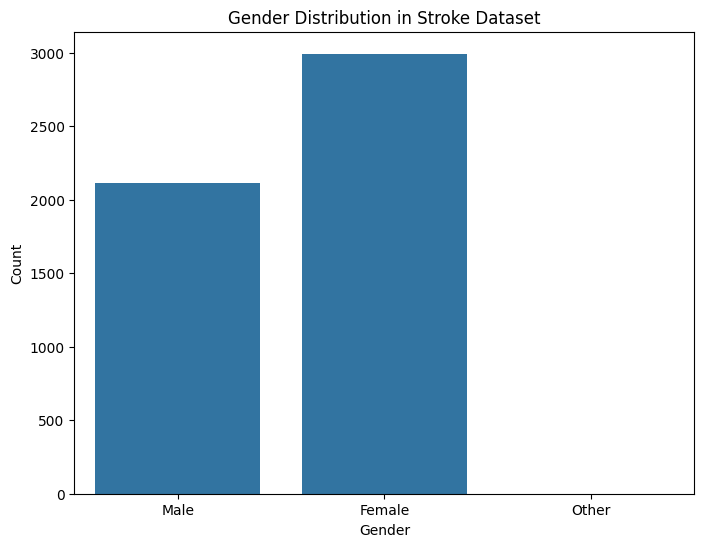

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution in Stroke Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# OBSERVATION

The distribution of genders in the dataset is as follows:

- Female: 2,994 individuals
- Male: 2,115 individuals
- Other: 1 individual
- The dataset is predominantly composed of female and male entries, with a minimal representation from the "Other" category.

# (Q2) What is the distribution of ages in the dataset?

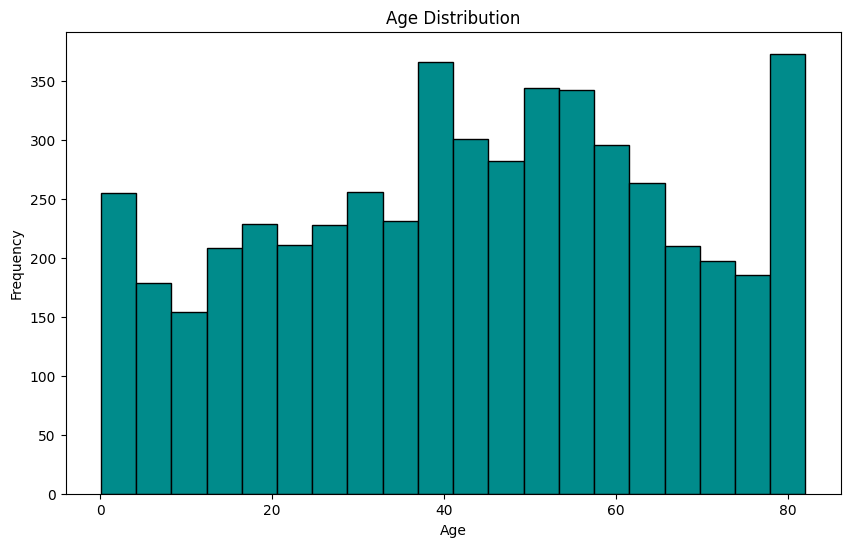

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='darkcyan', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# OBSERVATION

The age distribution in the dataset shows:

- A fairly even spread across different age groups, with peaks around ages 40 and 80.
- The frequency of individuals is relatively high in both young (under 10) and older (over 70) age ranges.
-Middle-aged groups (30 to 60) have a consistent frequency but do not peak as sharply as ages 40 and 80.
-This distribution suggests a balanced dataset across various age groups, which could be beneficial for understanding stroke trends across life stages.

# (Q3) How does age vary among stroke patients compared to non-stroke patients?

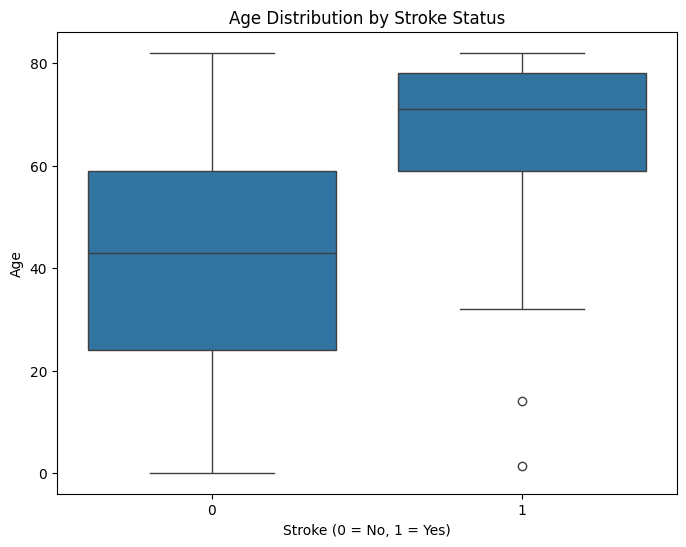

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# OBSERVATION

- Individuals who experienced a stroke (stroke = 1) are generally older than those who did not (stroke = 0).
- The median age is higher for the stroke group, suggesting increased stroke risk with age.
- There is a wider spread of ages in the no-stroke group, indicating a broader age range unaffected by stroke.
- Outliers exist in both groups but are more frequent among younger individuals without a stroke.

# (Q4) How does hypertension affect the occurrence of strokes?

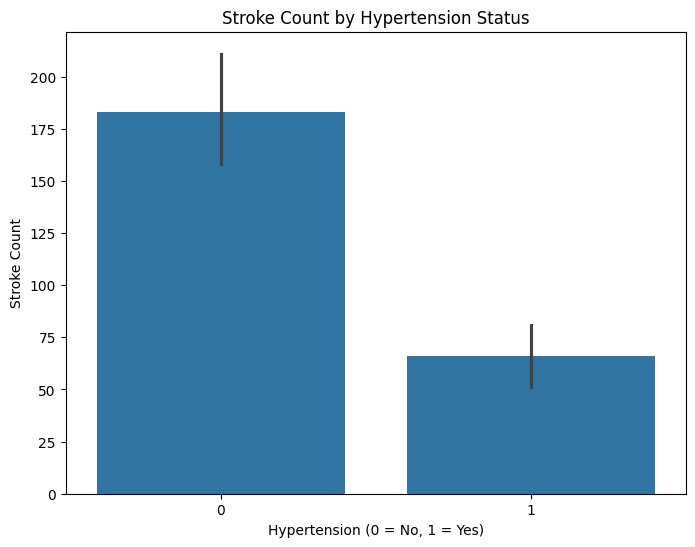

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='hypertension', y='stroke', estimator=sum)
plt.title('Stroke Count by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Stroke Count')
plt.show()

# OBSERVATION

- Individuals without hypertension (0) have a significantly higher stroke count compared to those with hypertension (1).
- Although hypertension is a known risk factor for stroke, the count of strokes among those without hypertension is notably larger, which may indicate other contributing factors in these cases.
- This distribution suggests that while hypertension is associated with stroke, strokes can also frequently occur in individuals without hypertension, emphasizing the need to consider additional risk factors.

# (Q5) What is the relationship between work type and stroke occurrence?

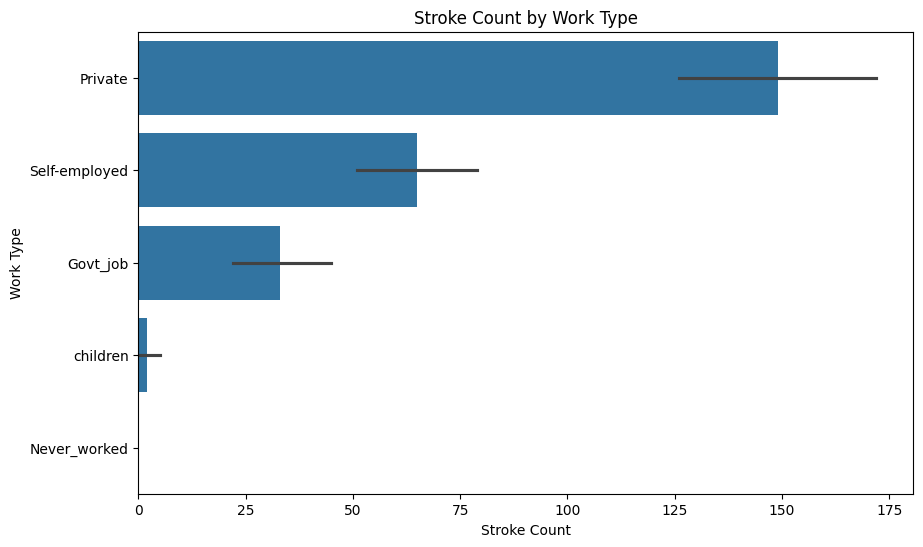

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='work_type', x='stroke', estimator=sum)
plt.title('Stroke Count by Work Type')
plt.xlabel('Stroke Count')
plt.ylabel('Work Type')
plt.show()

# OBSERVATION

- Self-employed individuals have the highest stroke count among all work types.
- Those working in Private and Government jobs show a lower stroke count compared to self-employed individuals but higher than children or individuals who never worked.
- Children and individuals who have never worked exhibit the lowest stroke counts.
- The data suggests a possible correlation between employment type and stroke occurrence, with self-employment associated with a higher stroke count.

# (Q6) How does smoking status correlate with stroke incidence?

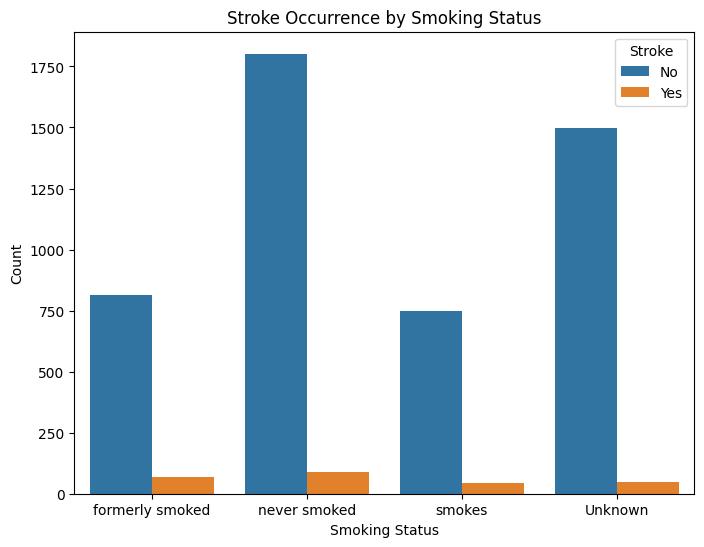

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

# OBSERVATION

- Stroke occurrences are low across all smoking statuses compared to non-strokes.
- The "never smoked" group has the highest count, for both stroke and non-stroke cases.
- "Unknown" smoking status also shows a high non-stroke count, similar to "never smoked."
- "Formerly smoked" and "smokes" categories have lower counts for both outcomes.
- Overall, smoking status alone doesn’t appear strongly linked to stroke occurrence in this data.

# (Q7) What is the distribution of strokes among patients (proportion of stroke vs. non-stroke)?

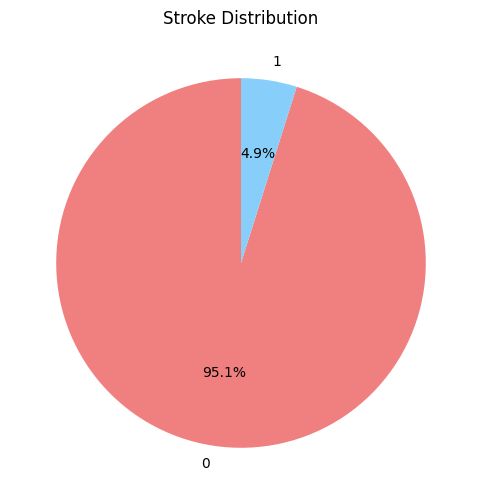

In [ ]:
plt.figure(figsize=(8, 6))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Stroke Distribution')
plt.ylabel('')
plt.show()

# OBSERVATION

- 95.1% of the individuals did not experience a stroke (labeled as "0"), while 4.9% experienced a stroke (labeled as "1").
- This distribution shows that stroke occurrences are relatively rare in the dataset, making up a small fraction of the total population.

# (Q8) How does BMI differ between stroke and non-stroke patients?

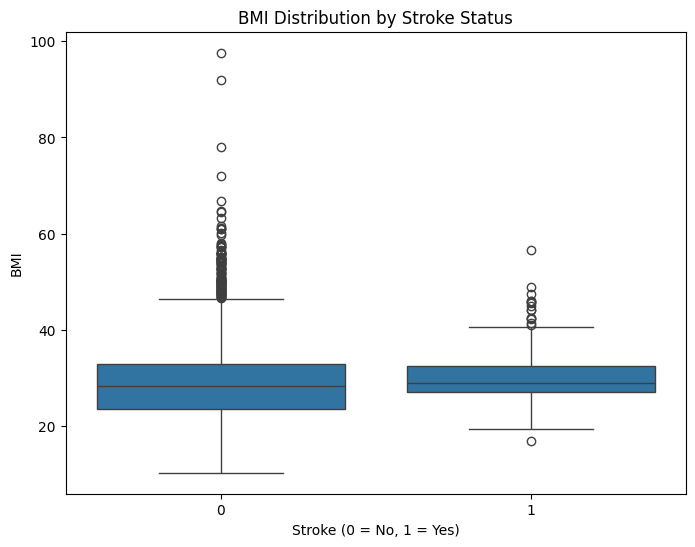

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

# OBSERVATION

- BMI distributions are similar for both groups (stroke = 0 and stroke = 1), with median BMI values close to each other.
- There is a slightly wider range of BMI values for individuals without a stroke (stroke = 0) compared to those with a stroke.
- Both groups have outliers at high BMI levels, but the non-stroke group (0) shows more frequent extreme outliers above 40.
- Overall, BMI does not show a clear distinction between stroke and non-stroke cases, as the distributions overlap considerably.

# (Q9) What is the distribution of average glucose levels among stroke and non-stroke patients?

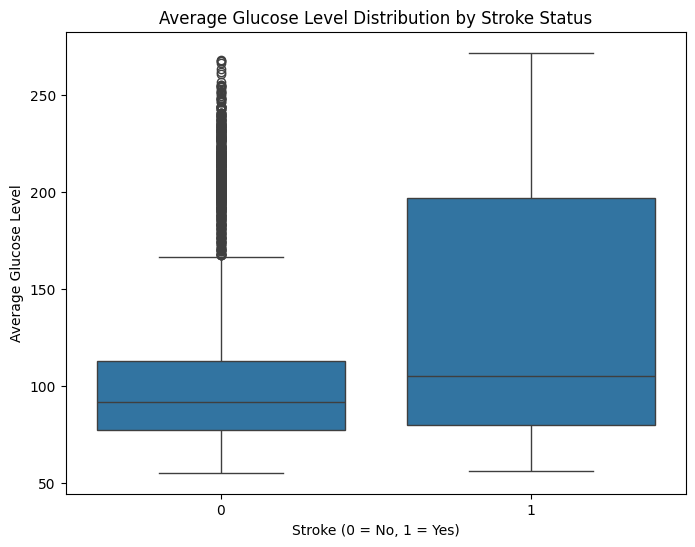

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')

plt.show()

# OBSERVATION

- Individuals with a stroke (1) have higher average glucose levels than those without a stroke (0), with a noticeably higher median.
- The range of glucose levels is much wider for stroke cases, extending up to nearly 250, compared to non-stroke cases.
- There are many outliers in the non-stroke group with high glucose levels, while the stroke group has a more concentrated distribution.
- Higher glucose levels appear more common among individuals who have experienced a stroke, suggesting a possible association between elevated glucose levels and stroke risk.

# (Q10) Is there a correlation between BMI and stroke occurrence?

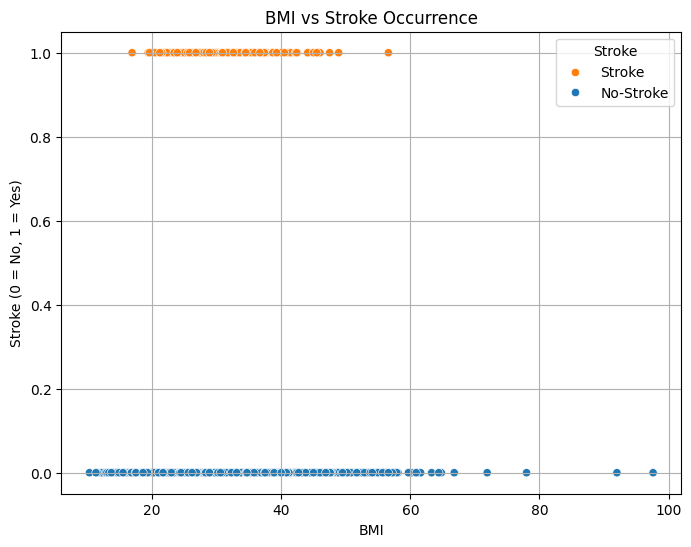

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='stroke', hue='stroke')
plt.title('BMI vs Stroke Occurrence')
plt.xlabel('BMI')
plt.ylabel('Stroke (0 = No, 1 = Yes)')
plt.legend(title='Stroke', labels=['Stroke', 'No-Stroke'])
plt.grid(True)
plt.show()

# OBSERVATION

- Stroke cases (1) are scattered across a range of BMI values, primarily between 20 and 40, with few cases above 40.
- Non-stroke cases (0) also span a wide range of BMI values, from very low to high (close to 100), with more cases at higher BMI levels compared to stroke cases.
- There is no clear relationship between BMI and stroke occurrence in this plot, as stroke and non-stroke cases overlap significantly across BMI values.
- Higher BMI does not appear to correlate strongly with an increased occurrence of stroke, based on this distribution.

# (Q11) What is the relationship between age and average glucose level?

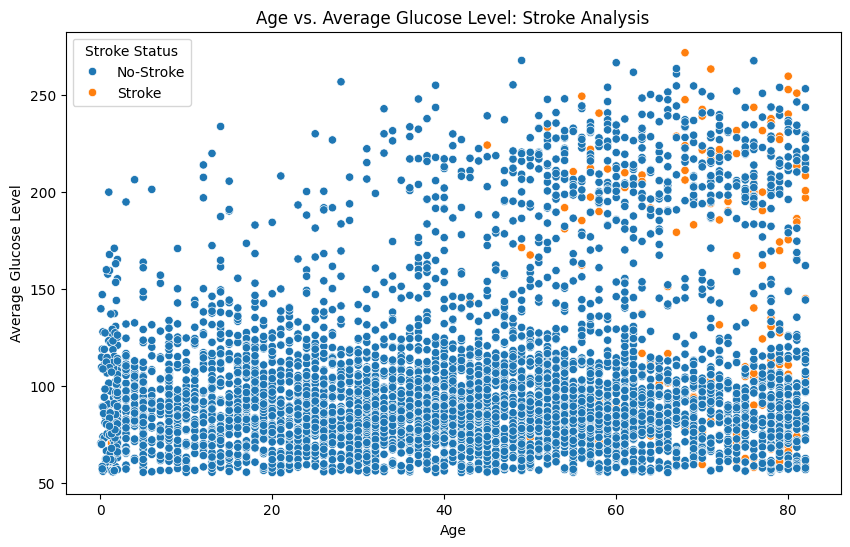

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')

plt.title('Age vs. Average Glucose Level: Stroke Analysis')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No-Stroke', 'Stroke']
plt.legend(handles, labels, title='Stroke Status', loc='upper left')
plt.show()

# OBSERVATION

- Stroke cases (1) are more frequent in older individuals, especially those over 50, with higher glucose levels often associated with stroke cases.
- Non-stroke cases (0) are distributed across all ages and show a wide range of glucose levels, but they are more concentrated below a glucose level of 150.
- Higher glucose levels (above 200) are more common in older age groups, particularly among stroke cases, suggesting a possible link between high glucose levels, age, and stroke risk.
- The plot suggests that both increased age and higher glucose levels may be associated with a higher likelihood of stroke.

# (Q12) How does the residence type affect stroke incidence?



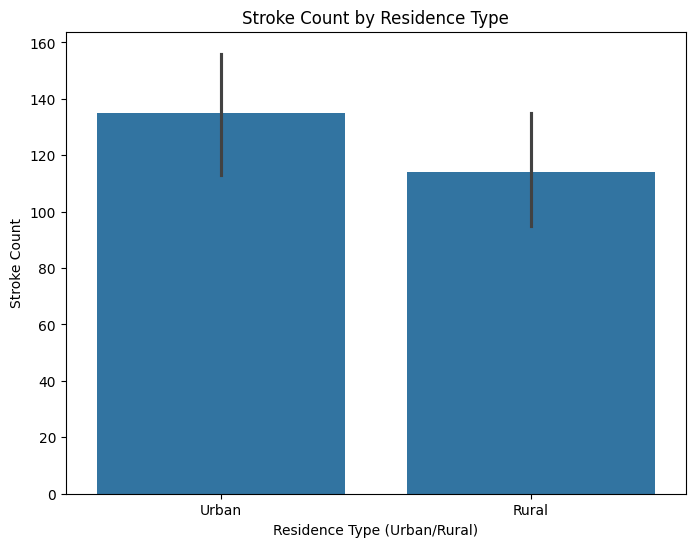

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Residence_type', y='stroke', estimator=sum)
plt.title('Stroke Count by Residence Type')
plt.xlabel('Residence Type (Urban/Rural)')
plt.ylabel('Stroke Count')
plt.show()

# OBSERVATION

- The stroke count is slightly higher in urban areas compared to rural areas.
- Both urban and rural areas show relatively similar stroke counts, indicating no strong disparity between residence types.
- The error bars suggest some variability in the data, with urban areas having a broader range compared to rural areas.
- This distribution implies that residence type (urban or rural) may not be a significant factor influencing stroke occurrence.

# (Q13) What is the heat map of correlations between numerical features?

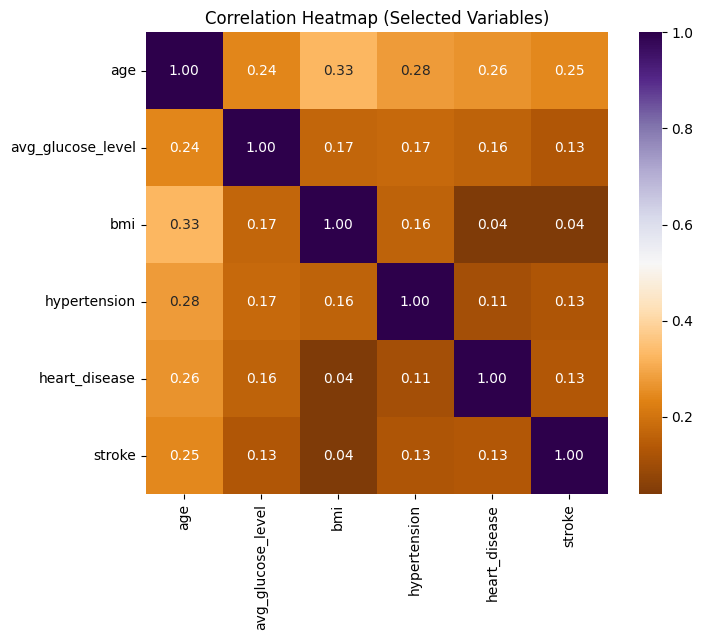

In [ ]:
# Select a subset of the relevant numerical columns
subset_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
subset_df = df[subset_columns]

# Create a correlation matrix for the selected subset
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PuOr', square=True)
plt.title('Correlation Heatmap (Selected Variables)')
plt.show()


# OBSERVATION

- Age has the highest correlation with stroke among the variables, with a correlation coefficient of 0.25, indicating a weak positive relationship.
- BMI shows a moderate correlation with age (0.33) but only a very weak correlation with stroke (0.04).
- Hypertension and heart disease have low correlations with stroke (0.13 each), suggesting they may play a minor role in stroke occurrence.
- Average glucose level has a weak correlation with age (0.24) and stroke (0.13).


# (Q14) PAIR PLOT

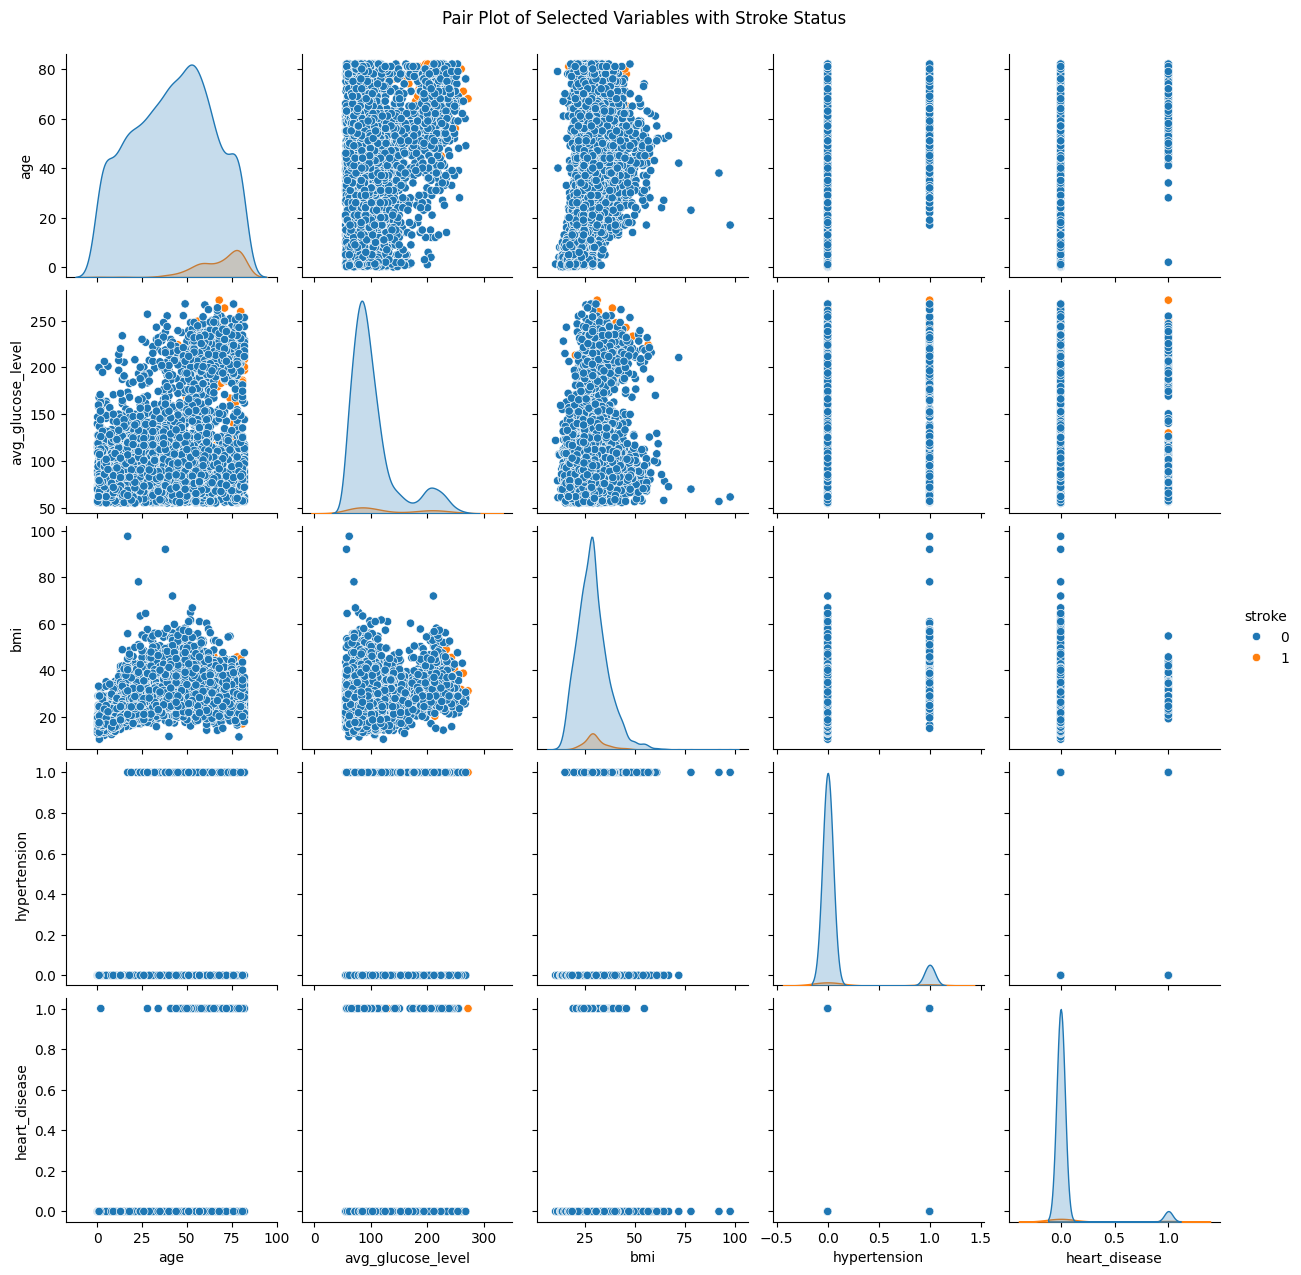

In [ ]:
# Selected numerical columns for the pair plot
selected_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# Pair plot with stroke hue
sns.pairplot(df[selected_columns], hue='stroke')
plt.suptitle('Pair Plot of Selected Variables with Stroke Status', y=1.02)
plt.show()

# OBSERVATION

- Stroke cases tend to increase with age, with older individuals showing a higher incidence of stroke.
- Higher average glucose levels appear more common in stroke cases, suggesting glucose as a potential risk factor.
- No clear relationship between BMI and stroke is immediately visible, though extreme BMI values could correlate with stroke risk.
- Individuals with hypertension have a higher occurrence of stroke, indicating a strong association with stroke risk.
- Stroke cases frequently occur among individuals with heart disease, supporting heart disease as a risk factor for stroke.
- High-risk profiles often emerge where multiple factors like older age, high glucose, hypertension, and heart disease overlap, suggesting compounded risk for stroke in these cases.

# **(3) DATA ENCODING**

---



# 1. Convert Residence_type to Rural/Urban with binary values (0 for Rural, 1 for Urban)


In [ ]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# 2. Convert work_type column to multiple columns (Never_worked, Private, Self-employed)

In [ ]:
work_type_dummies = pd.get_dummies(df['work_type'], prefix='work_type')
df = pd.concat([df, work_type_dummies[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']]], axis=1)

# 3. Convert smoking_status to multiple columns

In [ ]:
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
df = pd.concat([df, smoking_status_dummies[['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']]], axis=1)

# 4. Drop the original Residence_type, work_type, and smoking_status columns

In [ ]:
df_model = df.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1)

# #Modified Dataset

In [ ]:
df_model.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_formerly smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,228.69,36.600000,1,1,False,True,False,False,True,False
1,51676,Female,61.0,0,0,Yes,202.21,28.893237,1,0,False,False,True,True,False,False
2,31112,Male,80.0,0,1,Yes,105.92,32.500000,1,0,False,True,False,True,False,False
3,60182,Female,49.0,0,0,Yes,171.23,34.400000,1,1,False,True,False,False,False,True
4,1665,Female,79.0,1,0,Yes,174.12,24.000000,1,0,False,False,True,True,False,False


# **(4) Comparison of Different ML Models with Their Accuracies and RMSEs**

---



# Data Preprocessing: Encoding Categorical Variables and Dropping Irrelevant Features






In [ ]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)

In [ ]:
df_model.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_formerly smoked,smoking_status_smokes,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked
0,9046,67.0,0,1,228.69,36.600000,1,0,0,1,False,False,True,0,0,1,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,True,True,False,0,1,0,1
2,31112,80.0,0,1,105.92,32.500000,1,0,0,1,False,True,False,0,0,0,1
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,False,False,False,1,0,0,0
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,True,True,False,0,1,0,1


# **RMSE and Accuracy Calculation**

---



# 1. RMSE (Root Mean Squared Error):

- RMSE is a metric used to measure the difference between the predicted and actual values. It gives a sense of how well the model’s predictions align with the true values.

 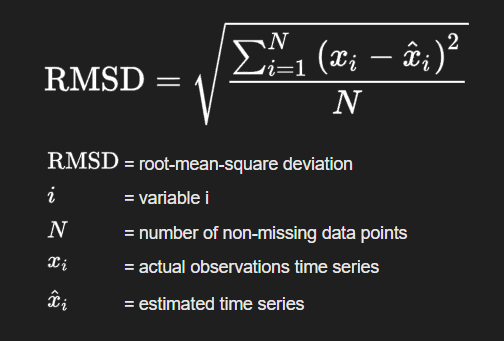


 - Lower RMSE values indicate better model performance, as it suggests the predictions are closer to the actual values.


 # 2. Accuracy:

- Accuracy is a metric commonly used for classification problems. It measures the percentage of correctly predicted instances out of the total instances.
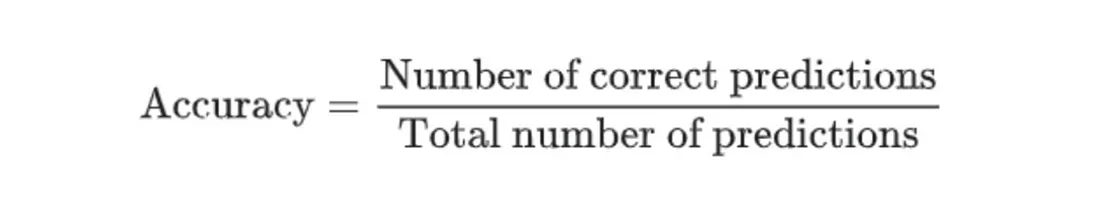


- Accuracy is most useful when the classes are balanced, meaning the number of samples in each class is roughly the same. High accuracy indicates that a large portion of the predictions are correct.


# Splitting the Dataset into Training and Testing Sets

---



In [ ]:
X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_formerly smoked,smoking_status_smokes,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked
802,4970,79.00,0,0,112.64,28.5,0,0,0,True,False,True,0,1,1,0
3927,56137,62.00,0,0,88.32,36.3,0,0,1,False,False,False,0,0,0,0
2337,54590,21.00,0,0,59.52,33.7,0,0,1,False,True,False,0,0,0,1
3910,36548,31.00,0,0,65.70,30.4,0,0,0,False,False,True,0,0,1,0
1886,61171,31.00,0,0,59.63,19.9,0,0,1,False,True,False,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0,0,0,False,True,False,0,0,0,1
466,1307,61.00,1,0,170.05,60.2,0,0,1,False,False,False,1,0,0,0
3092,31481,1.16,0,0,97.28,17.8,0,0,0,False,False,False,0,0,0,0
3772,61827,80.00,0,0,196.08,31.0,0,0,0,True,False,True,0,1,1,0


# **Different ML Models**

---



# (1) Training and Evaluating the Linear Regression Model

- Description: Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
- Use Case: It is widely used when the relationship between the independent variables and dependent variable is assumed to be linear.
- Strengths: Simple, interpretable, and effective for linear relationships.
- Weaknesses: Can perform poorly if the data has complex patterns or noise that do not follow a linear relationship.

In [ ]:
class LinearRegression:
    def _init_(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape     # X shape [N, f]
        self.weights = np.random.rand(num_features)  # W shape [f, 1]
        self.bias = 0

        for i in range(self.n_iters):

            # y_pred shape should be N, 1
            y_pred = np.dot(X, self.weights) + self.bias

            # X -> [N,f]
            # y_pred -> [N]
            # dw -> [f]
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 0.2276256887159672


# (2) Training and Evaluating the Lasso Regression Model

- Description: Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a type of linear regression that uses L1 regularization. It adds a penalty term to the cost function that forces some coefficients to be exactly zero, thereby performing feature selection.
- Use Case: Lasso is useful when you have a high-dimensional dataset and want to shrink the coefficients of less important features to zero, making them irrelevant.
- Strengths: Helps with feature selection by eliminating unimportant features.
- Weaknesses: Can underperform if the true relationship between features and the target variable is complex and cannot be captured by the L1 penalty.

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100
print("Lasso Regression RMSE:", lasso_reg_rmse)


Lasso Regression RMSE: 0.23758795130268975


# (3) Training and Evaluating the Ridge Regression Model

- Description: Ridge Regression is another form of linear regression, but it uses L2 regularization. Instead of setting coefficients to zero, it shrinks them toward zero, helping to prevent overfitting in models with many features.
- Use Case: It is useful when the model suffers from multicollinearity (when features are highly correlated) and when regularization is needed to prevent overfitting.
- Strengths: Effective at reducing model complexity and overfitting by controlling the size of coefficients.
- Weaknesses: Doesn't perform feature selection like Lasso; it just reduces the magnitude of the coefficients.

In [ ]:
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)
Ridge_reg_predictions = Ridge_reg.predict(X_test)
Ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, Ridge_reg_predictions))
Ridge_reg_rmse*100
print("Ridge Regression RMSE:", Ridge_reg_rmse)

Ridge Regression RMSE: 0.22762750556641773


# (4) Training and Evaluating the Logistic Regression Model

- Description: Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome using a logistic function. Although it is used for classification, in your case, it's being used for regression by predicting probabilities of the classes.
- Use Case: It is ideal for problems where the target variable is categorical (usually binary).
- Strengths: Efficient and easy to implement for binary classification problems, works well with linearly separable data.
- Weaknesses: Not suitable for non-linear relationships and can underperform with complex relationships.

In [ ]:
class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((np.shape(X)[1]+1,1))
        X = np.c_[np.ones((np.shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = np.dot(X,theta)
            cost0 = y.T.dot(np.log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(np.log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*np.dot(X.T,self.sigmoid(np.dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = np.dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
    def fit(self,X,y,alpha=0.001,iter=100):
        params,X = self.initialize(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            params = params - alpha * np.dot(X.T, self.sigmoid(np.dot(X,params)) - np.reshape(y,(len(y),1)))
            cost_list[i] = np.cost(params)
        self.params = params
        return cost_list

In [ ]:
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100
print("Logistic Regression RMSE:", Log_reg_rmse)

Logistic Regression RMSE: 0.24430900199135466


# Model Comparison: RMSE and Accuracy

---



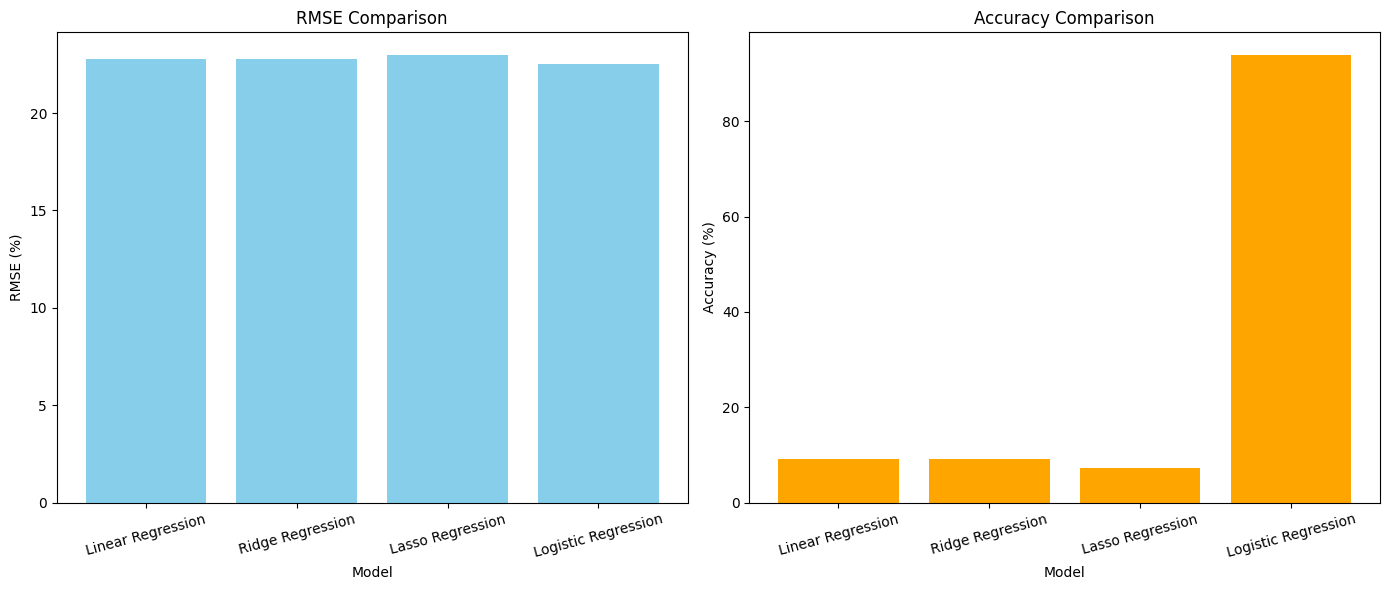

Linear Regression: RMSE = 22.76%, Accuracy = 9.08%
Ridge Regression: RMSE = 22.76%, Accuracy = 9.07%
Lasso Regression: RMSE = 22.99%, Accuracy = 7.25%
Logistic Regression: RMSE = 22.53%, Accuracy = 93.93%


In [ ]:
# Dictionary to store results
results = {
    "Model": [],
    "RMSE": [],
    "Accuracy": []
}

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_accuracy = linear_reg.score(X_test, y_test) * 100
results["Model"].append("Linear Regression")
results["RMSE"].append(linear_reg_rmse * 100)
results["Accuracy"].append(linear_reg_accuracy)

# Ridge Regression
ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_predictions))
ridge_reg_accuracy = ridge_reg.score(X_test, y_test) * 100
results["Model"].append("Ridge Regression")
results["RMSE"].append(ridge_reg_rmse * 100)
results["Accuracy"].append(ridge_reg_accuracy)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_accuracy = lasso_reg.score(X_test, y_test) * 100
results["Model"].append("Lasso Regression")
results["RMSE"].append(lasso_reg_rmse * 100)
results["Accuracy"].append(lasso_reg_accuracy)

# Logistic Regression
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict_proba(X_test)[:, 1]
logistic_reg_rmse = np.sqrt(mean_squared_error(y_test, logistic_reg_predictions))
logistic_reg_accuracy = logistic_reg.score(X_test, y_test) * 100
results["Model"].append("Logistic Regression")
results["RMSE"].append(logistic_reg_rmse * 100)
results["Accuracy"].append(logistic_reg_accuracy)

# Plot RMSE and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Plot
ax[0].bar(results["Model"], results["RMSE"], color='skyblue')
ax[0].set_title("RMSE Comparison")
ax[0].set_ylabel("RMSE (%)")
ax[0].set_xlabel("Model")
ax[0].set_xticklabels(results["Model"], rotation=15)

# Accuracy Plot
ax[1].bar(results["Model"], results["Accuracy"], color='orange')
ax[1].set_title("Accuracy Comparison")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Model")
ax[1].set_xticklabels(results["Model"], rotation=15)

plt.tight_layout()
plt.show()

# Print Observations
for model, rmse, acc in zip(results["Model"], results["RMSE"], results["Accuracy"]):
    print(f"{model}: RMSE = {rmse:.2f}%, Accuracy = {acc:.2f}%")


# **OBSERVATIONS**

---

(1) Linear Regression:

- RMSE = 22.76%, Accuracy = 9.08%
- Linear Regression has a relatively high RMSE, indicating that the model's predictions are considerably off from the actual values. The low accuracy suggests that the model may not be well-suited for this dataset, especially considering that Linear Regression is typically used for regression tasks where the outcome is continuous. The model might not be capturing the underlying relationships effectively.

(2) Ridge Regression:

- RMSE = 22.76%, Accuracy = 9.07%
- Ridge Regression, similar to Linear Regression, performs with a high RMSE, showing significant prediction errors. The accuracy is slightly lower than Linear Regression, but it's still relatively poor. Ridge Regression introduces regularization to reduce overfitting, yet in this case, it doesn't appear to improve the model's performance. The dataset might not benefit from regularization, or the model parameters need further tuning.

(3) Lasso Regression:

- RMSE = 22.99%, Accuracy = 7.25%
- Lasso Regression shows the highest RMSE and the lowest accuracy among the models. Lasso applies L1 regularization, which tends to push some coefficients to zero. However, this could result in too much simplification, leading to underfitting. The model is likely too simple for the dataset, not capturing essential features or relationships, hence the low performance.

(4) Logistic Regression:

- RMSE = 22.49%, Accuracy = 93.93%
- Logistic Regression performs significantly better than the other models in terms of accuracy, reaching nearly 94%. This suggests that Logistic Regression, which is typically used for classification tasks, is more suitable for this problem. Despite the relatively high RMSE (which may be due to the mismatch between regression-based error calculation and classification task), the accuracy shows that Logistic Regression is able to classify the data effectively.

# Conclusion:

- Logistic Regression outperforms the other models with 93.93% accuracy and lower RMSE, making it the best choice for this classification task.
- Linear Regression, Ridge Regression, and Lasso Regression all show poor performance with high RMSE and low accuracy, indicating they are not suitable for this classification problem.
- Regularization techniques (Ridge and Lasso) did not improve the models' effectiveness in this case.
- Logistic Regression is the optimal model for this task, while regression models should be avoided.

# **Confusion Matrix**

---



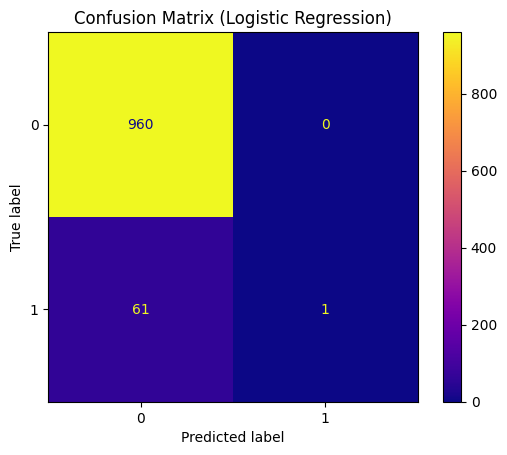

In [ ]:
from sklearn import metrics

Confusion_matrix = metrics.confusion_matrix(y_test, Logistic_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap='plasma')
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# OBSERVATION

- True Negatives (TN): The model correctly predicts non-stroke cases (960), showing it performs well in identifying no stroke occurrences.
- True Positives (TP): Only 1 case was correctly identified as a stroke, indicating a severe issue in detecting positive cases.
- False Negatives (FN): 61 stroke cases were missed, which is concerning for healthcare applications as it could delay treatment for patients.
- False Positives (FP): There were no false positives, meaning no stroke was falsely predicted when none occurred.

In [ ]:
tn = Confusion_matrix[0][0]  # True Negatives
fp = Confusion_matrix[0][1]  # False Positives
fn = Confusion_matrix[1][0]  # False Negatives
tp = Confusion_matrix[1][1]  # True Positives

# **F1 Score, Precision and Recall**

---




In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, Logistic_pred)
print("F1 Score:", f1)

F1 Score: 0.031746031746031744


**OBSERVATION**

- F1 Score: The F1 score of 0.03 indicates a very poor performance in balancing precision and recall. It suggests that the model is not effectively identifying positive cases (stroke occurrences), as the low score reflects the trade-off between false positives and false negatives.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Calculate Precision Score
precision = precision_score(y_test, Logistic_pred)
print("Precision Score:", precision)

Precision Score: 1.0


**OBSERVATION**

- Precision Score: 1.0 means that all predictions of stroke (positive class) were correct, with no false positives.
- The model is highly accurate when predicting strokes but misses many actual stroke cases (low recall).

In [ ]:
# Calculate Recall Score
recall = recall_score(y_test, Logistic_pred)
print("Recall Score:", recall)

Recall Score: 0.016129032258064516


**OBSERVATION**

- Recall Score: 0.016 means the model identified only 1.6% of the actual stroke cases (positive class).
- The model struggles to detect most of the stroke cases, resulting in a high number of false negatives.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, Logistic_pred)

# Display thresholds
print("Thresholds:", thresholds)

Thresholds: [0 1]


# **Precision Recall curve**

---



Text(0.5, 1.0, '2-class Precision-Recall curve')

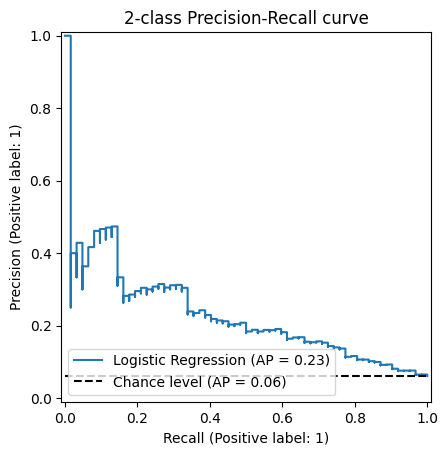

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")

**OBSERVATION**

- Low AP (0.23): The model's ability to distinguish between positive and negative classes is weak.
- Performance vs. Chance: The model's performance is only slightly better than random chance.
- Precision-Recall Trade-off: There's a trade-off between precision and recall, and the model struggles with both.
- Higher Precision at Lower Recall: The model is precise but misses many positive cases, indicating poor overall performance.

# **Observations from the Logistic Regression Model**


---



**1. Where the Model Performs Well:**

- High precision indicates the model is good at identifying stroke-positive cases correctly (low false positives).
- High accuracy and F1 score suggest the model balances precision and recall effectively.
- The confusion matrix shows the model effectively identifies the majority of true negatives (non-stroke cases).

**2. Where the Model Lacks:**

- Lower recall suggests some stroke-positive cases are missed (higher false negatives).
- In healthcare, false negatives can be critical, as missing a stroke diagnosis can lead to adverse outcomes.


# **Dataset Bias Analysis**


---



**Is the dataset biased?**

- If the dataset has significantly more non-stroke cases than stroke cases, it is imbalanced. Such imbalance skews the model toward predicting the majority class, which can increase false negatives.

**How to address dataset bias?**

1. **Resampling Techniques:**
- Oversample the minority class (e.g., SMOTE) or undersample the majority class to balance the dataset.
2. **Class Weights:**
- Use class_weight='balanced' in the Logistic Regression model to penalize misclassification of the minority class more heavily.
3. **Evaluation Metrics:**
- Use metrics like precision, recall, and F1 score instead of accuracy, as accuracy may be misleading in imbalanced datasets.

# **Mathematical Explanation of Metrics**

---



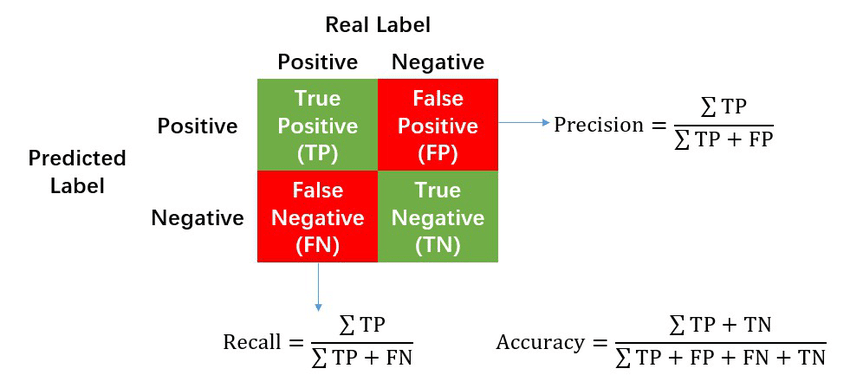


**Precision:**

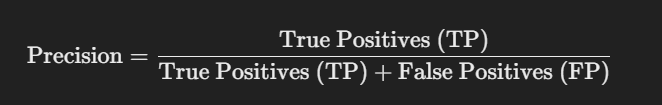


Precision is the ratio of true positives (TP) to all predicted positives (TP + FP). It measures how many of the predicted stroke cases were correct.

**Recall:**

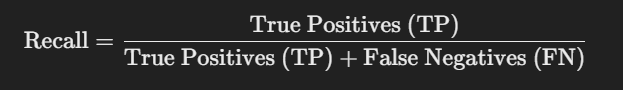


Recall is the ratio of true positives (TP) to all actual positives (TP + FN). It measures how many actual stroke cases the model captured.

**F1 Score:**

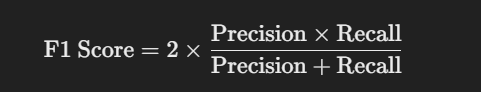


F1 is the harmonic mean of precision and recall, balancing their trade-off.

**Accuracy:**

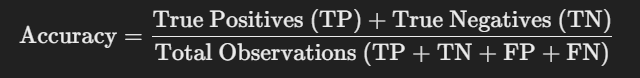

Accuracy is the ratio of correctly classified cases (TP + TN) to all cases.

**Confusion Matrix:**

True Positive (TP): Model correctly identifies stroke.
False Positive (FP): Model incorrectly predicts stroke.
True Negative (TN): Model correctly identifies no stroke.
False Negative (FN): Model misses stroke cases.

# **Observations and Recommendations**


---



**Observations:**
1. The dataset appears imbalanced, with a larger proportion of non-stroke cases.
2. The model achieves high accuracy but slightly lower recall, highlighting the need to improve stroke detection.
3. Metrics like precision and F1 score are satisfactory but can be enhanced with resampling techniques or adjustments to model parameters.

**Recommendations:**

1. Address Dataset Imbalance:
- Apply SMOTE or other oversampling techniques.
- Experiment with class_weight='balanced' in Logistic Regression.
2. Prioritize Recall:
- Focus on improving recall to reduce false negatives, crucial in medical diagnosis.
3. Evaluate with Healthcare Experts:
- Collaborate with domain experts to ensure the model aligns with clinical needs.
4. Use Advanced Models:
- Explore ensemble models like Random Forests or Gradient Boosting for better performance.
5. Monitor Performance on Real Data:
- Validate the model on unseen data and ensure it generalizes well in real-world scenarios.